# Analysis of a submaximal test

<b>Protocol ergometer:</b>
resistance mode with velocity target (settings for a 20% and 40% submaximal test protocol, see Wingate test)

<b>Description of the sprint test: </b>
Participants are asked to propel the wheelchair at a comfortable speed for 4 minutes.

<b>Outcome: </b>
Velocity, power and propulsion technique related output

First, let us import the right package(s)

In [7]:
import worklab as wl
import os

filename = os.getcwd()
filename_ergo = os.path.join('r',filename, 'example_data', 'Submax ergo_example.xls')
filename_spiro = os.path.join('r',filename, 'example_data', 'Submax spiro_example.xlsx')

Let's define some user-specific variables (you can alternatively store these in a separate file)

In [8]:
start_ergo = 180  # s, start submaximal block ergometer
start_spiro = 240  # s, start submaximal block spirometer

Import and process data ergometer:

In [9]:
wheelchair = wl.com.load_wheelchair(filename_ergo)
data = wl.com.load_esseda(filename_ergo)
data = wl.kin.filter_ergo(data)
data = wl.kin.process_ergo(data, wheelsize=wheelchair['wheelsize'],rimsize=wheelchair['rimsize'],)
data = wl.ana.mean_data(data)
data = wl.ana.cut_data(data, start_ergo+180, start_ergo+240)  # we analyze the fourth minute
for side in data:
        data[side]['speed'] = data[side]['speed'] * 3.6

Now, we can do a push-by-push analyses and visualize it, we can see whether all pushes have been found.
If not, there are a few settings of the wil.kin.push_by_push_ergo() you can modify: look for it in the documentation:cutoff, minpeak, mindist. (notice how we modified the minpeak for this participant)


Found left: 42 , right: 42 and mean: 42 pushes!



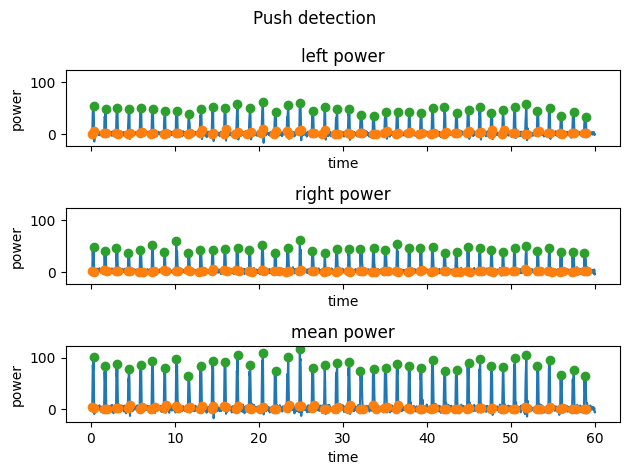

In [10]:
data_pbp = wl.kin.push_by_push_ergo(data, minpeak=20)
pushes_sprint = wl.plots.plot_pushes_ergo(data, data_pbp)

The ergometer data is ready, and we have to process the spirometer data. In this case, we used the COSMED K5. There is also a function for the METAMAX 3B, other devices we do not support, but you can make the code yourself ofcourse!

In [11]:
data_spiro = wl.com.load_spiro(filename_spiro)
data_spiro = wl.physio.cut_spiro(data_spiro, start_spiro+180, start_spiro+240)  # we analyze the fourth minute

Now we have imported both data sources, and it is time to combine them, this is done with one simple function! If you are interested in more specific variables, feel free to calculate them yourself!

In [12]:
outcomes = wl.ana.ana_submax(data, data_pbp, data_spiro)
print(outcomes)

   mean_vel  meanpower  ptime_l   ptime_r   ctime_l   ctime_r       ca_l   
0  4.932647  10.720945    0.265  0.331667  1.428293  1.426829  60.943448  \

        ca_r  meanpowerperpush  maxpowerperpush  angle_deg       slope   
0  75.647078          49.74474        86.784217  63.227878  163.808259  \

   smoothness      freq       RER          EE         HR       VO2        me  
0    0.574568  0.700735  0.802373  176.526764  91.454545  0.529574  6.073269  
